In [1]:
import math
import pandas as pd
import networkx as nx
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as pltcol
pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [22]:
#Erzeuge Knoten, Kanten aus Datei mit Metadaten
def get_meta_entity(meta, metadata_entities):
    cur_authors =  meta["Authors"].split(",")
    
    #Nodes ggf Edges mit Typen belegen (zB Author, Paper whatever), Typen im Nachgang zur einer Kategorialen Variable/Spalte in einem gesonderten Dataframe bauen
    #Colormap mit (anzahl Types) möglichen Farben. bei Draw, node_color = categorial, cmap=colormap
    #siehe https://towardsdatascience.com/customizing-networkx-graphs-f80b4e69bedf
    
    #Kantenerstellung zwischen allen Titeln und Erstellungsdatum als Attribut
    metadata_entities.add_node(meta["Titles"], date=meta["Date"], color=0.8) #Attribute können auch die Keywords sein, die üner NLP generiert wurden
    metadata_entities.add_node(meta["Conference"], color=3.2)
    #Kantenerstellung zwischen Überklasse paper und allen Titeln 
    metadata_entities.add_edge("Paper", meta["Titles"], label="ist")
    #Beziehung zwischen Überklasse Konferenz und allen Konferenztiteln
    metadata_entities.add_edge("Konferenz", meta["Conference"], label="ist")
    
    metadata_entities.add_edge(meta["Titles"], meta["Conference"], label="ist Teil von")
    
    for author in cur_authors:
        metadata_entities.add_node(author, color=2)
        metadata_entities.add_edge(author, meta["Titles"], label="hat verfasst")
        metadata_entities.add_edge("Autor", author, label="ist")
        
    return metadata_entities

In [25]:
#Farbschema des Graphen
def kg_colors(graph, vmin=0, vmax=7):
    cnorm = pltcol.Normalize(vmin=vmin, vmax=vmax)
    cpick = cm.ScalarMappable(norm=cnorm, cmap='turbo')
    cpick.set_array([])
    val_map = {}
    for k, v in nx.get_node_attributes(graph, 'color').items():
        val_map[k] = cpick.to_rgba(v)
    colors = []
    for node in graph.nodes():
        colors.append(val_map[node])
    return colors

In [26]:
#muss ich hier die Excel lesen? Die meta_control wird doch returned. Das noch umstellen

metadata_csv = pd.read_excel('C:/Users/Jana/LabCode/metadata_list.xlsx') 
#Initialerstellung Graph
G_Meta= nx.MultiDiGraph()

#Erstellung initial fester Knoten
G_Meta.add_node("Paper", color=0.9)
G_Meta.add_node("Autor", color=2)
G_Meta.add_node("Konferenz", color=3)
#Idee: statt hier metadata_csv zu nehmen, die meta_control nehmen
for i in range(len(metadata_csv)):
    G_Meta = get_meta_entity(metadata_csv.iloc[i], G_Meta)

colors = kg_colors(G_Meta)

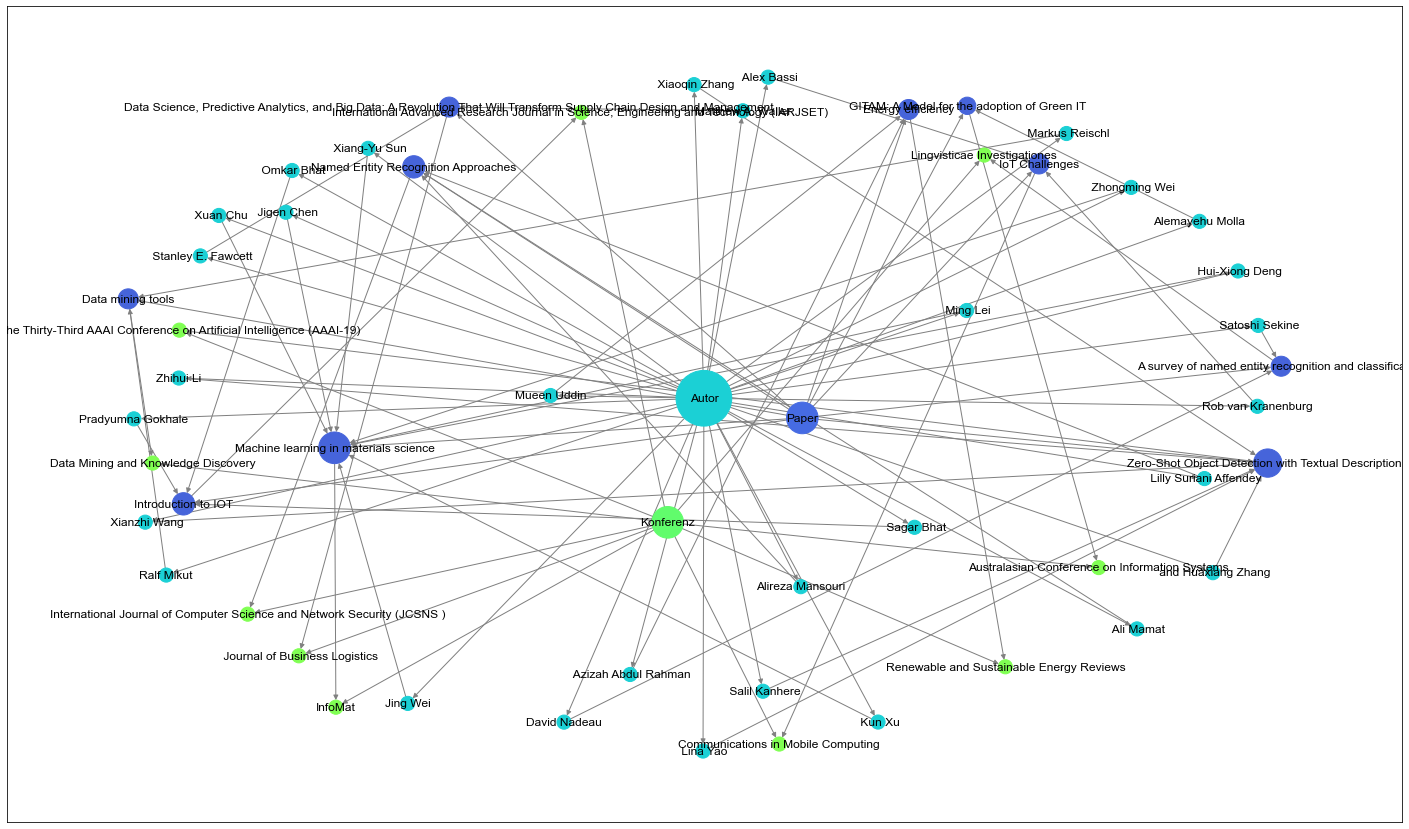

In [28]:
#Ausgabe Graph
plt.figure(figsize=(25,15))
pos = nx.spring_layout(G_Meta, k=10/math.sqrt(G_Meta.order())) # richtiges Layout noch finden
d = dict(G_Meta.degree)
nx.draw_networkx(G_Meta, with_labels=True, pos=pos, node_size=[v * 100 for v in d.values()], node_color=colors, edge_color= 'grey', font_family = 'Arial') 
plt.show()

In [30]:
print(keywords_attr_bert)

NameError: name 'keywords_attr_bert' is not defined